**Transfer Learning Inception V3 using Keras**

**Clone respository from github**

In [36]:
! git clone https://github.com/xocobo12/Grape-Disease-Detection.git

fatal: destination path 'Grape-Disease-Detection' already exists and is not an empty directory.


**Preprocess**

In [37]:
#Import Libs

from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
from os import listdir
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.2
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/client/session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [38]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
#from tensorflow.keras.applications.resnet152V2 import ResNet152V2
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [39]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

#Desde Drive
train_path = '/content/Grape-Disease-Detection/Train'
valid_path = '/content/Grape-Disease-Detection/Test'

#Local
#train_path = '/content/Train'
#valid_path = '/content/Test'

#dataseth_path = "/content/drive/MyDrive/Notebooks/Grape"

In [40]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights
import tensorflow
resnet152V2 =tensorflow.keras.applications.ResNet152V2(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [41]:
# don't train existing weights
for layer in resnet152V2.layers:
    layer.trainable = False

In [42]:
# useful for getting number of output classes
folders = glob('/content/Grape-Disease-Detection/Train/*')
#folders = glob('/content/drive/MyDrive/Notebooks/Grape/*')

In [43]:
# our layers - you can add more if you want
x = Flatten()(resnet152V2.output)

In [44]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet152V2.input, outputs=prediction)

In [45]:
# Model Architecture
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 114, 114, 64) 0           conv1_conv[0][0]                 
____________________________________________________________________________________________

In [46]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [47]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [48]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/Grape-Disease-Detection/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 3255 images belonging to 4 classes.


In [49]:
test_set = test_datagen.flow_from_directory('/content/Grape-Disease-Detection/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 817 images belonging to 4 classes.


**Training**



In [50]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/20
102/102 [==============================] - 1040s 10s/step - loss: 1.2049 - accuracy: 0.8919 - val_loss: 0.3465 - val_accuracy: 0.9657
Epoch 2/20
102/102 [==============================] - 980s 10s/step - loss: 0.2912 - accuracy: 0.9619 - val_loss: 0.2448 - val_accuracy: 0.9657
Epoch 3/20
102/102 [==============================] - 961s 9s/step - loss: 0.3192 - accuracy: 0.9665 - val_loss: 0.2451 - val_accuracy: 0.9755
Epoch 4/20
102/102 [==============================] - 963s 9s/step - loss: 0.2061 - accuracy: 0.9739 - val_loss: 0.2409 - val_accuracy: 0.9792
Epoch 5/20
102/102 [==============================] - 963s 9s/step - loss: 0.1859 - accuracy: 0.9779 - val_loss: 0.1464 - val_accuracy: 0.9853
Epoch 6/20
102/102 [==============================] - 951s 9s/step - loss: 0.3735 - accuracy: 0.9702 - val_loss: 0.3471 - val_accuracy: 0.9718
Epoch 7/20
102/102 [==============================] - 952s 9s/step - loss: 0.1966 - accuracy: 0.9806 - val_loss: 0.2161 - val_accuracy: 0.9

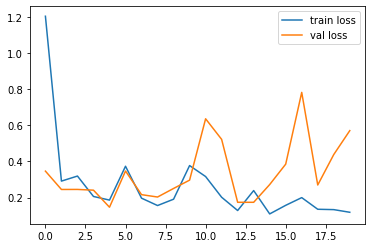

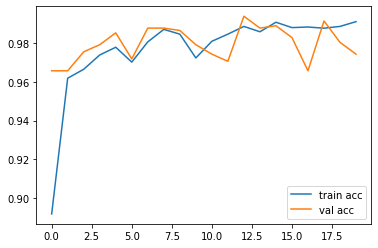

<Figure size 432x288 with 0 Axes>

In [51]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [52]:
# save it as a h5 file

from tensorflow.keras.models import load_model

model.save('model_resnet152V2.h5')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [53]:
y_pred = model.predict(test_set)

In [54]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [56]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

model=load_model('model_resnet152V2.h5')

In [57]:
img=image.load_img('/content/Grape-Disease-Detection/Test/Grape___Esca_(Black_Measles)/0075b632-2e34-4e4f-9697-fe2b332b7ef8___FAM_B.Msls 4399.JPG',target_size=(224,224))

In [58]:
x=image.img_to_array(img)
x.shape


(224, 224, 3)

In [59]:
x=x/255
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [60]:
model.predict(img_data)

array([[9.9999952e-01, 2.2748991e-14, 1.2111315e-14, 4.5009668e-07]],
      dtype=float32)

In [62]:
a=np.argmax(model.predict(img_data), axis=1)
a==1

array([False])